# Libraries

Import your libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import statistics as cal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix

# Importing Data

Import the CSV file with Actions, Sum and Div as a Dataframe called df. Fill the empty values of Action with 0. 
Replace NaN values with 0. Delete first 100 rows. 

# Preparing Data

Split the Dataframe in chunks van n/100 seconden. Combine to 1 dataframe. With Sum,Div and Action split into Train and Valid/Test. 

In [2]:
def Dataloader(CsvFile, ChunkSize, ChunkOverlap, OperationList):
#CsvFile = put in the filename(as string) example : matrix_player_15_game_2_quartersplit.csv
#ChunkSize = put in the size you want the chunks to be (in seconds) example: 1
#ChunkOverlap = the size you want the chunks to overlap (in seconds) example: 0.5
#Operationlist = input dataframe of names with operations that u want to make changes to. example:
                                #Operationlist = pd.DataFrame({'frAcc':['cal.mean'], 'wheelRotationalSpeedX':['cal.mea']})


#load in csv file
    df = pd.read_csv(CsvFile)

    chunks = [df[i:i+ChunkSize] for i in range(0,df.shape[0],ChunkOverlap)]

    frames = []

    for chunk in chunks:
        chunk = chunk.drop(columns=['Unnamed: 0'])
        frames.append(chunk)

        
    df_end =[]
    
    for frame in frames:
        if len(frame) == 100:
            result = [] #Reset the result array
            for column in list(frame.columns):
        
                if column in OperationList: #Check if column is in namelist
            
                    if OperationList[str(column)].values == 'cal.mean': #You can at more function if you want
                        X = cal.mean(frame[str(column)].tolist()) #Calculate mean of all columns named in namelist with operation cal.mean
            
                    else: #If the given operations isn't cal.mean
                        frame[str(column)] = [abs(ele) for ele in frame[str(column)]] #Get absolute value of all elements in list
                        X = max(frame[str(column)].tolist()) #Get single max value from list 
       
                else:
                    frame[str(column)] = [abs(ele) for ele in frame[str(column)]] #Get absolute value of all elements in list
                    X = max(frame[str(column)].tolist()) #Get single max value from list
            
                result.append(X) #Append results to list
        
            df_end.append(result) #Append all results into one big list
    
    df_end = pd.DataFrame(df_end, columns = list(frame.columns)) #Convert list to df
    return(df_end)
    


In [3]:
OperationList = [{ 'wheelRotationalSpeedX' : ['Cal.mean']}]
df = Dataloader('matrix_Player_15_game_2_QuarterSplit.csv', 100, 50, OperationList)
#print(Dataloader('matrix_Player_15_game_2_QuarterSplit.csv', 100, 50, OperationList))

In [4]:
df

,frAcc,frRoAcc,frDispl,frRoAng,frSpeed,timeLine,frameRotationalSpeedX,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,wheelRotationalSpeedY,wheelRotationalSpeedZ,frRoSpeed,Sum_WheelX_FrameZ,Div_FrameZ_WheelX,Filt_WheelX,Filt_FrameZ,Collision,Quarter
0,56.98200,2828.8,3394.9,88.04700,1.106100,3581.0,63.945,64.6600,80.7240,188.8800,61.9500,90.0980,3055.300,196.06200,324.758929,87.547693,63.582821,0,1
1,56.98200,2828.9,3410.8,164.91000,1.106100,3581.5,63.945,64.6600,165.3400,188.8800,86.1860,90.0980,3055.300,196.06200,76.200000,87.547693,73.345130,0,1
2,19.69000,2828.9,3410.8,228.56000,0.935400,3582.0,17.570,19.7400,228.7000,84.7310,193.7800,108.4800,2456.100,181.33500,1002.057084,65.140780,204.540434,0,1
3,22.80600,2828.8,3389.3,228.56000,1.196400,3582.5,18.984,19.7400,228.7000,113.6100,193.7800,108.4800,2456.100,218.52000,1002.057084,77.306432,204.540434,0,1
4,22.80600,2828.5,3312.7,106.98000,1.196400,3583.0,18.984,8.3300,107.7900,159.6700,86.9870,55.6290,1530.100,218.52000,434.736430,114.848074,204.182064,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9056,0.70001,6556.8,1948.5,6.78380,0.072376,8602.0,2.380,1.5867,7.2022,5.6544,6.6500,5.1800,54.922,12.74700,6.545497,4.496939,8.456229,0,4
9057,0.40442,6556.8,1948.4,6.78380,0.053704,8602.5,1.820,1.0920,5.8800,5.4600,4.1922,2.1210,65.299,10.45330,4.142857,4.410329,5.823097,0,4
9058,0.36332,6556.8,1946.8,5.75390,0.052281,8603.0,1.820,1.0422,4.8533,5.4600,4.1922,2.1467,65.299,10.13440,4.142857,4.418443,3.237448,0,4
9059,0.17616,6556.8,1946.7,0.74254,0.009661,8603.5,1.470,1.0422,1.3222,2.4500,2.1700,2.1467,21.614,2.24622,1.125006,4.418443,2.107930,0,4


In [5]:
df['wheelRotationalSpeedXDiff'] = np.insert(np.diff(df.wheelRotationalSpeedX,n=1),0,0)
df['frameRotationalSpeedXDiff'] = np.insert(np.diff(df.frameRotationalSpeedX,n=1),0,0)
df['frameRotationalSpeedYDiff'] = np.insert(np.diff(df.frameRotationalSpeedY,n=1),0,0)
df['frameRotationalSpeedZDiff'] = np.insert(np.diff(df.frameRotationalSpeedZ,n=1),0,0)

df['Sum_WheelX_FrameZ'] = df.wheelRotationalSpeedX + df.frameRotationalSpeedZ

In [6]:
def rounddown(x):
    return(int(math.ceil(x/100.0))*100) - 100

In [7]:
# split chunk data into train test validate (with colum [sum and Div] as input, and action as output)

train = df[df.Quarter != 4]
test = df[df.Quarter == 4]

column1 = ['frSpeed']
column2 = ['frSpeed','frAcc']
column3 = ['frSpeed','frAcc','wheelRotationalSpeedXDiff']
column4 = ['frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc' ]
column5 = ['frSpeed','frAcc','wheelRotationalSpeedX','frRoAcc','frameRotationalSpeedX' ]
column6 = ['frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc','frameRotationalSpeedZ','wheelRotationalSpeedX' ]
column7 = ['timeLine','frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc','frameRotationalSpeedZ','wheelRotationalSpeedX','Filt_FrameZ' ]
column8 = ['frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc','frameRotationalSpeedZ','wheelRotationalSpeedX','Filt_FrameZ','Filt_WheelX' ]
column9 = ['wheelRotationalSpeedXDiff']
column10 = ['wheelRotationalSpeedXDiff','Filt_WheelX']
column11 = ['wheelRotationalSpeedXDiff','Filt_WheelX','Filt_FrameZ']
column12 = ['wheelRotationalSpeedXDiff','frSpeed','frAcc','frameRotationalSpeedZ']
column13 = ['frAcc','frSpeed','frameRotationalSpeedZ','Sum_WheelX_FrameZ','wheelRotationalSpeedXDiff']
column14 = ['timeLine','frSpeed','frAcc','wheelRotationalSpeedXDiff','frRoAcc','frameRotationalSpeedX','frameRotationalSpeedY','frameRotationalSpeedZ','wheelRotationalSpeedX','Filt_FrameZ','frameRotationalSpeedXDiff','frameRotationalSpeedYDiff','frameRotationalSpeedZDiff']

column15 = ['frAcc','frameRotationalSpeedX','frameRotationalSpeedY','frameRotationalSpeedZ','wheelRotationalSpeedX']
column16 = ['frSpeed','frAcc','frRoAcc','frameRotationalSpeedX','frameRotationalSpeedZ','wheelRotationalSpeedX','Filt_FrameZ']
column17 = ['frSpeed','frAcc','frameRotationalSpeedX','frameRotationalSpeedZ','wheelRotationalSpeedX']



X_train = train[column17]

y_train = train[['Collision']]

print(sum(y_train.values))

X_test = test[column17]

y_test = test[['Collision']]


[53]


In [8]:
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(type(y_res['Collision'].values))
print(type(y_test['Collision'].values))
print(f"Training target statistics: {Counter(y_res['Collision'].values)}")
print(f"Testing target statistics: {Counter(y_test['Collision'].values)}")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Training target statistics: Counter({0: 4747, 1: 4747})
Testing target statistics: Counter({0: 4207, 1: 54})


# Gridsearch toepassen


In [9]:

tree_model_2 =  RandomForestClassifier(class_weight='balanced',n_jobs = 10, random_state = 6)


param_grid_model_2 = {'n_estimators': [100, 200, 500,800], 'max_depth': [10,20,50] ,  'min_samples_leaf': [1,2,5,8,10] } 



#tree = GridSearchCV(tree_model_2,param_grid_model_2)
tree = RandomForestClassifier(class_weight='balanced',n_jobs = 10, random_state = 6, max_depth = 50, min_samples_leaf = 1, n_estimators = 500)
tree = tree.fit(X_res, y_res)
#print(tree.best_params_)
# print(tree.best_score_)
# print("Test accuracy of best grid search hypers:", tree.score(X_test, y_test))

/tmp/ipykernel_39259/3071229806.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree = tree.fit(X_res, y_res)


# Validate/Tune Model

Validate results of the model (Precision/Recall). Tune the parameters of the model to achieve better results

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


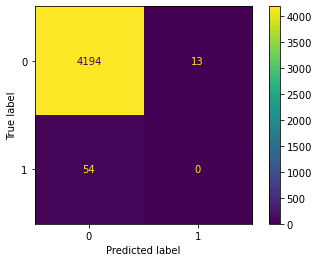

In [10]:
#GridsearchCV Polynomials
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

In [11]:
y_pred_test = tree.predict(X_test)

In [12]:
print(accuracy_score(y_test, y_pred_test))

0.9842759915512791


In [13]:
print(precision_score(y_test, y_pred_test))

0.0


In [14]:
print(recall_score(y_test, y_pred_test))

0.0


In [15]:
feature_imp = pd.Series(tree.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

frSpeed                  0.302814
frAcc                    0.246095
frameRotationalSpeedX    0.185813
wheelRotationalSpeedX    0.162227
frameRotationalSpeedZ    0.103051
dtype: float64

No handles with labels found to put in legend.


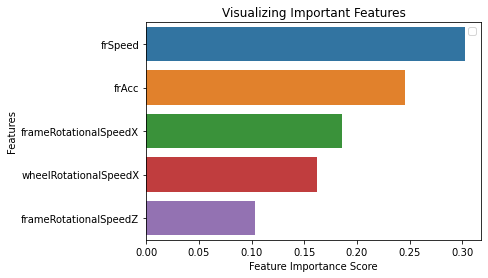

In [16]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()